# Introduction
## Part 3: Linear Algebra

In this tutorial, you will learn how to solve linear algebra problems using [NumPy](https://numpy.org/).
Linear algebra is a branch of mathematics that solves
multidimensional problems using matrices and vectors.
These types of problems arise in many different fields (biology, economics, physics,
etc.), so this is one of the most practical branches of mathematics that there
is.

Since this tutorial is primarily conceptual and not comprehensive, those who are
entirely new to this field may need a more complete resource to help them along.
[This appendix](./griffiths-linear-algebra-appendix.pdf)
from Griffith's *Introduction to Quantum Mechanics* gives a concise, yet comprehensive, overview that can serve as a reference.

We will use the
[harmonic oscillator](https://en.wikipedia.org/wiki/Harmonic_oscillator)
as a toy example for getting an intuitive grasp of one of the most fundamental concepts in linear algebra, the eigenvalue problem.
Let us begin by reviewing the one-dimensional case.

### Review: 1-Dimensional Harmonic Oscillator

#### Hooke's Law

In your physics class, you may have discussed Hooke's law, which states that the
force on a spring displaced from its equilibrium length has a magnitude
proportional to its displacement and a direction opposite to its displacement.
This is called a "restoring force", because it acts to *restore* the system to
equilibrium.

Consider a spring fixed at one and stretched to a position $x$ along the
$x$-axis, relative to its equilibrium position $x_0$.

![1d-spring](../../.github/1d-spring-hookes-law.svg)

This is described by the following equation.
$$
  f(x)
  = - k (x - x_0)
  = - k \, \Delta x
$$
To see how this corresponds to Hooke's law, consider what happens to the force
for $x < x_0$ (compression), $x = x_0$ (equilibrium), and $x > x_0$ (extension).
The constant $k$ is the "spring constant", a physical property of the spring
describing how strongly it resists displacement.


#### Quadratic Potential

On [Wikipedia](https://en.wikipedia.org/wiki/Hooke%27s_law), you will read that
"Hooke's law is only a first-order linear approximation to the real response of
springs and other elastic bodies to applied forces."
We will see that this linear approximation to the force corresponds to a
quadratic approximation of the potential energy.
To see this, recall that a conservative force, $f(x)$, is equal to the negative
first derivative of the potential energy of the system, $V(x)$.
$$
  f(x)
  =
  -
  \frac{\partial V(x)}{\partial x}
$$
For small displacements, the potential can be approximated by a second-order
quadratic [Taylor series](https://en.wikipedia.org/wiki/Taylor%27s_theorem) about its equilibrium value.
Furthermore, since the force necessarily vanishes at equilibrium,
$\frac{\partial V(x_0)}{\partial x} = - f(x_0) = 0$, the first-order term drops
out.
This leaves the following potential.
$$
  V(x)
  \approx
  V(x_0)
  +
  \frac{1}{2}
  \frac{\partial^2 V(x_0)}{\partial x^2}
  \Delta x^2
$$
To be an equilibrium point, $x_0$ must also correspond to a local minimum of the
potential energy, so this potential has the shape of an upward parabola centered
at $x_0$.

![1d-spring-potential](../../.github/1d-spring-hookes-law-quadratic-potential.svg)

Substituting this into the force equation above gives us the "first-order linear
approximation" of the force referenced in the quote.
$$
  f(x)
  =
  -
  \frac{\partial^2 V(x_0)}{\partial x^2}
  \Delta x
$$
Comparing this with Hooke's law gives a simple interpretation of the spring
constant as the second derivative of the potential energy at equilibrium,
$k =\frac{\partial^2 V(x_0)}{\partial x^2}$.
As pointed out by the quote, this is an *approximation* that is valid specifically
for displacements that are small relative to the shape of the quadratic well.

### Linear Algebra: $n$-Dimensional Spring Oscillator

Recall again the definition of the restoring force described by Hooke's law:
its equilibrium length has a magnitude proportional to its displacement and a
direction opposite to its displacement.
To generalize this for an $n$-dimensional system, let us naïvely replace our equation above with a vector equation.
$$
  \mathbf{f}(\mathbf{x})
  =
  -k
  (\mathbf{x} - \mathbf{x}_0)
  =
  -k
  \Delta \mathbf{x}
$$
This does indeed describe a force that points back toward equilibrium,
$\mathbf{x}_0$, but now there is some question about the *direction* of the displacement in $n$-dimensional space.
It turns out that, for a given potential, only certain special directions will
satisfy the above equation.
To see this, let us proceed as we did above to analyze Hooke's law by
recognizing that it represents a linear approximation of the true force and a
quadratic approximation of the potential energy.
Again recognizing that
$\frac{\partial V(\mathbf{x}_0)}{\partial \mathbf{x}} = -\mathbf{f}(\mathbf{x}_0)=0$,
the second-order quadratic approximation of an $n$-dimensional potential has
[the following form](https://en.wikipedia.org/wiki/Taylor_series#Taylor_series_in_several_variables).
$$
\begin{align*}
  V(\mathbf{x})
  &\approx
  V(\mathbf{x}_0)
  +
  \frac{1}{2}
  \sum_{i=1}^n
  \sum_{j=1}^n
  \frac{\partial^2 V(\mathbf{x}_0)}{\partial x_i \partial x_j}
  \Delta x_i \Delta x_j
  \\
  &=
  V(\mathbf{x}_0)
  +
  \frac{1}{2}
  \Delta \mathbf{x}^\dagger\,
  \mathbf{H}(\mathbf{x}_0)\,
  \Delta \mathbf{x}
\end{align*}
$$
Here, $\mathbf{H}(\mathbf{x}_0)$ is the Hessian matrix of the potential energy, evaluated at equilibrium, $\mathbf{x}_0$.
Again, the force is the negative derivative (or "gradient") of the potential, which leads to the following expression.
$$
  \mathbf{f}(\mathbf{x})
  =
  -
  \frac{\partial V(\mathbf{x})}{\partial \mathbf{x}}
  =
  -
  \mathbf{H}(\mathbf{x}_0)\,
  \Delta \mathbf{x}
$$
Combining combining this with our Hooke's law equation above, we find that the displacements must satisfy the following equation.
$$
  \mathbf{H}(\mathbf{x}_0)\, \Delta \mathbf{x}
  =
  k \Delta \mathbf{x}
$$


## Example: Finding Normal Modes with NumPy

As an example, let us consider the following 2-dimensional potential energy function.
$$
  V(\mathbf{x})
  =
  \frac{(x - y) ^2}{2}
  +
  (x + y) ^2
$$
We can use `matplotlib` to plot this potential and see what it looks like.

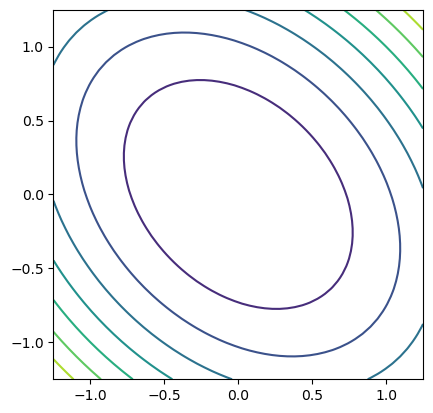

In [1]:
from matplotlib import pyplot
import numpy


# Define 2D potential function
def potential(x, y):
    return (x - y) ** 2 / 2 + (x + y) ** 2

# Generate figure object
fig, ax = pyplot.subplots()
ax.set_aspect("equal")

# Get potential values on a grid
xs = numpy.linspace(-1.25, 1.25)
ys = numpy.linspace(-1.25, 1.25)
x_, y_ = numpy.meshgrid(xs, ys)
potential(x_, y_)

# Create a contour plot of the potential
ax.contour(x_, y_, potential(x_, y_))

#### $x$-Axis Displacement

Now, consider what happens when we displace by one unit along the $x$-axis.
$$
  \Delta \mathbf{x}
  =
  \begin{pmatrix}
    1 \\
    0
  \end{pmatrix}
$$
Let us plot this vector against our potential to see what it looks like.

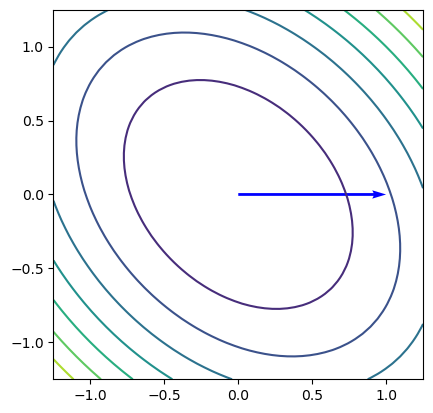

In [2]:
# Define a re-usable vector plotting function
def plot_vector(ax: pyplot.Axes, vec, orig=(0, 0), color: str = "black"):
    start = numpy.array(orig)
    end = numpy.add(orig, vec)
    ax.quiver(*start, *end, angles="xy", scale_units="xy", scale=1, color=color)

# Define displacement vector
dx = [1, 0]

# Plot displacement vector
plot_vector(ax, dx, color="blue")

# Show the figure
fig

If this was a Hooke's law-type displacement, it would result in a restoring
force pointing straight back towards equilibrium.
From the plot, you may guess that this is not the case.
Intuitively, if we imagine a marble released from this position in the potential
well, we can predict that it will start to roll south-west rather than directly
back towards the center.
To work this out concretely, we need to evaluate the more general force expression derived above.
$$
  \mathbf{f}(\mathbf{x})
  =
  -\frac{\partial V(\mathbf{x})}{\partial \mathbf{x}}
  =
  -\mathbf{H}(\mathbf{x}_0)\,
  \Delta \mathbf{x}
$$
By differentiating the potential formula either analytically (by hand or using [sympy](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html)) or numerically (using your code from the previous project), you will find that the Hessian matrix of this potential is as follows.
$$
  \mathbf{H}
  =
  \begin{pmatrix}
    \frac{\partial^2 V}{\partial x^2} & \frac{\partial^2 V}{\partial x \partial y} \\
    \frac{\partial^2 V}{\partial y \partial x} & \frac{\partial^2 V}{\partial y^2}
  \end{pmatrix}
  =
  \begin{pmatrix}
    3 & 1 \\
    1 & 3
  \end{pmatrix}
$$
Since the potential is quadratic, the Hessian is constant and does not depend on $\mathbf{x}$.
We are now in a position to plug this into the force expression above and plot the force vector.

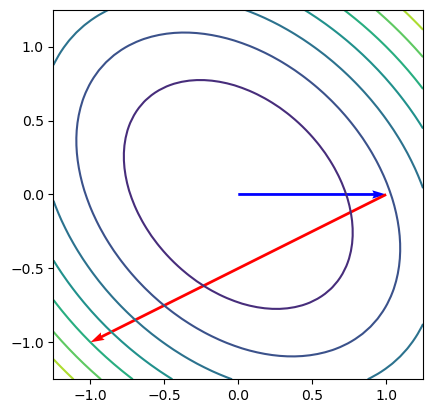

In [3]:
# Define Hessian matrix
H = numpy.array([[3, 1], [1, 3]])

# Determine force vector
force = -H @ dx  # `@` is the matrix multiplication operator

# Plot force vector
plot_vector(ax, force, orig=dx, color="red")

# Show the figure
fig